In [662]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

In [645]:
#load the dataset

boston = load_boston()
print(boston.keys())
data = pd.DataFrame(boston.data, columns=boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [646]:
# Create a target column with the dataset target

data['MEDV'] = pd.Series(boston.target)

In [647]:
#print the first five rows

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [648]:
# check the data (exploratory analysis)
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

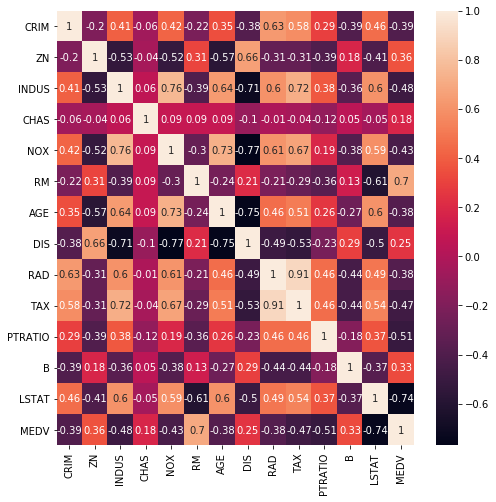

In [649]:
correlation = data.corr().round(2)
plt.figure(figsize=(8,8))
sns.heatmap(data=correlation, annot=True)

In [650]:
#investigate data.

#sns.FacetGrid(data, col='target', row='CRIM')
#plt.show()

In [651]:
### select the most important features. Some questions you can ask yourself:
#- What are the correlations?
#- Independent or dependent?
#- Does the feature have different values across the dataset?

Text(0, 0.5, 'MDEV')

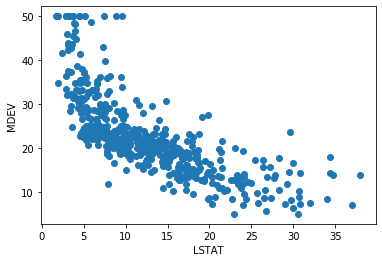

In [652]:
# as features, we want to choose variable with a strong correlation with the target.
# we can see that LSTAT and RM are highly correlated with target, so we use those 2 columns as features

features = ['LSTAT', 'RM']

# we can create scatterplot to see the relation between features and target

plt.scatter(data['LSTAT'], data['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MDEV')

Text(0, 0.5, 'MDEV')

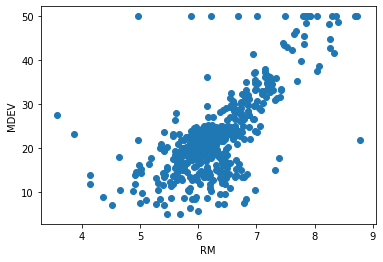

In [653]:
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel('RM')
plt.ylabel('MDEV')

In [654]:
X = data[features]
y = data['MEDV']

In [655]:
# normalizing features

X = StandardScaler().fit_transform(X)

In [656]:
## split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [657]:
## Pick one model to use, such as Linear Regression -seen in class-.

lrc = LinearRegression()
lrc.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [658]:
## test the accuracy and print the score with one model

print('Training Score for linear regression: {}'.format(lrc.score(X_train, y_train)))
print('Testing Score for linear regression: {}'.format(lrc.score(X_test, y_test)))

Training Score for linear regression: 0.6501592679428922
Testing Score for linear regression: 0.5739577415025859


In [664]:
# training and testing with randomforest

rfc = RandomForestRegressor(random_state=99)
rfc.fit(X_train, y_train)

print('Training Score for random forest: {}'.format(rfc.score(X_train, y_train)))
print('Testing Score for random forest: {}'.format(rfc.score(X_test, y_test)))

Training Score for random forest: 0.9611847713353414
Testing Score for random forest: 0.6796947225079937


In [631]:
# using selectKbest to find best features

from sklearn.feature_selection import SelectKBest

X = data.drop('MEDV', axis=1) #independent columns
y = data['MEDV'] #target column i.e price range
y = np.round(data['MEDV'])

#Apply SelectKBest class to extract top features

bestfeatures = SelectKBest()
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score'] #naming the dataframe columns

featureScores.sort_values('Score', ascending=False)

,Specs,Score
12,LSTAT,24.182227
5,RM,12.704038
0,CRIM,11.633806
9,TAX,7.454442
6,AGE,7.265725
4,NOX,7.251824
2,INDUS,7.086330
8,RAD,5.761701
10,PTRATIO,5.657609
11,B,4.036147


In [641]:
# using the best score features

features = ['LSTAT', 'RM', 'CRIM', 'TAX']
X = data[features]
y = data['MEDV']

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

lrc.fit(X_train, y_train)

print('Training Score with linear regression: {}'.format(lrc.score(X_train, y_train)))
print('Testing Score with linear regression: {}'.format(lrc.score(X_test, y_test)))

Training Score: 0.6683105683524482
Testing Score: 0.5681206774328447


In [665]:
# training and testing with randomforest

rfc = RandomForestRegressor(random_state=99)
rfc.fit(X_train, y_train)

print('Training Score for random forest: {}'.format(rfc.score(X_train, y_train)))
print('Testing Score for random forest: {}'.format(rfc.score(X_test, y_test)))

Training Score for random forest: 0.9611847713353414
Testing Score for random forest: 0.6796947225079937


In [630]:
# using all the column but target as features

X = data.drop('MEDV', axis=1)
y = data['MEDV']

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

lrc.fit(X_train, y_train)

print('Training Score: {}'.format(lrc.score(X_train, y_train)))
print('Testing Score: {}'.format(lrc.score(X_test, y_test)))

Training Score: 0.7508856358979673
Testing Score: 0.6687594935356321


In [666]:
# training and testing with randomforest

rfc = RandomForestRegressor(random_state=99)
rfc.fit(X_train, y_train)

print('Training Score for random forest: {}'.format(rfc.score(X_train, y_train)))
print('Testing Score for random forest: {}'.format(rfc.score(X_test, y_test)))

Training Score for random forest: 0.9611847713353414
Testing Score for random forest: 0.6796947225079937
